<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT RISK MODELLING

## Importing Libraries



In [1]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix


warnings.filterwarnings(action="ignore")
%matplotlib inline

## Loading Data

In [33]:
# Loading Data
credit_risk = pd.read_csv('/content/raw-data.csv')
credit_risk.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [34]:
#Renaming columns in the dataset with their correct names
credit_risk_renamed = credit_risk.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
credit_risk_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


## Exploratory Data Analysis (EDA)

In [ ]:
credit_risk_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [ ]:
#percentage of missing values ordered
credit_risk_renamed.isnull().mean().sort_values(ascending=False)

,0
Time since last Personal loan taken (in months),0.887633
Total sanctioned amount in the unsecured Loans which are Live,0.840807
Total sanctioned amount in the secured Loans which are Live,0.838691
Time since first consumer durables loan taken (in months),0.829053
Max amount sanctioned in the Live loans,0.693578
Resident type of customer,0.296140
No of advance EMI paid,0.288468
Date of birth,0.288468
Employment type,0.288468
Rate of interest,0.288468


In [ ]:
credit_risk_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,3.662600e+04,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,2.742192e+05,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,7.916241e+05,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,1.000000e+00,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,4.190700e+04,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,9.500000e+04,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,3.000000e+05,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,1.000000e+08,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000


### Data distribution for numerical and categorical features

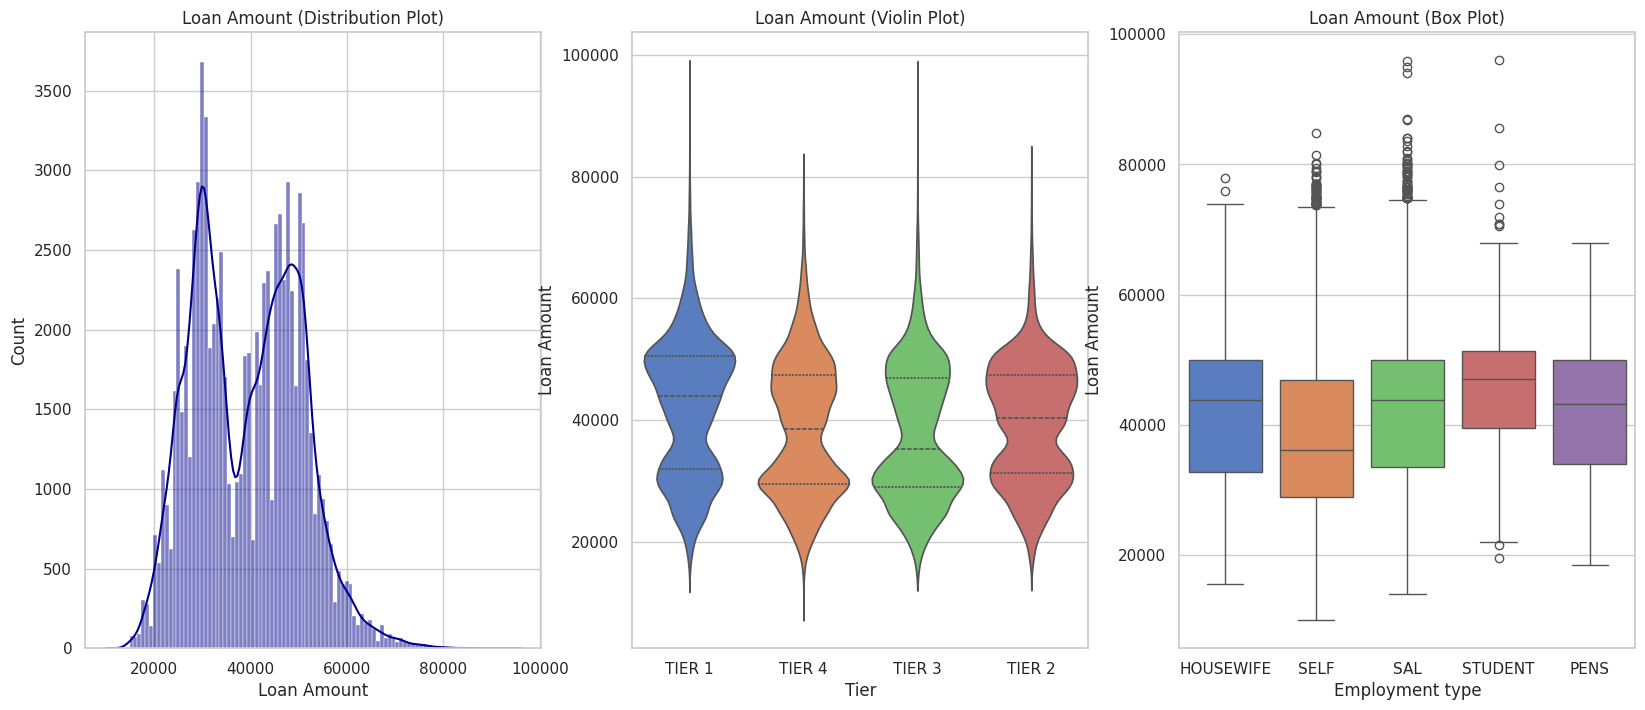

In [ ]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

ax[0].set_title("Loan Amount (Distribution Plot)")
sns.histplot(credit_risk_renamed['Loan Amount'], ax=ax[0], kde=True, color='darkblue')
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data=credit_risk_renamed, x='Tier', y='Loan Amount', ax=ax[1], inner="quartile", palette='muted')
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data=credit_risk_renamed, x='Employment type', y='Loan Amount', ax=ax[2], orient='v', palette='muted')
plt.show()

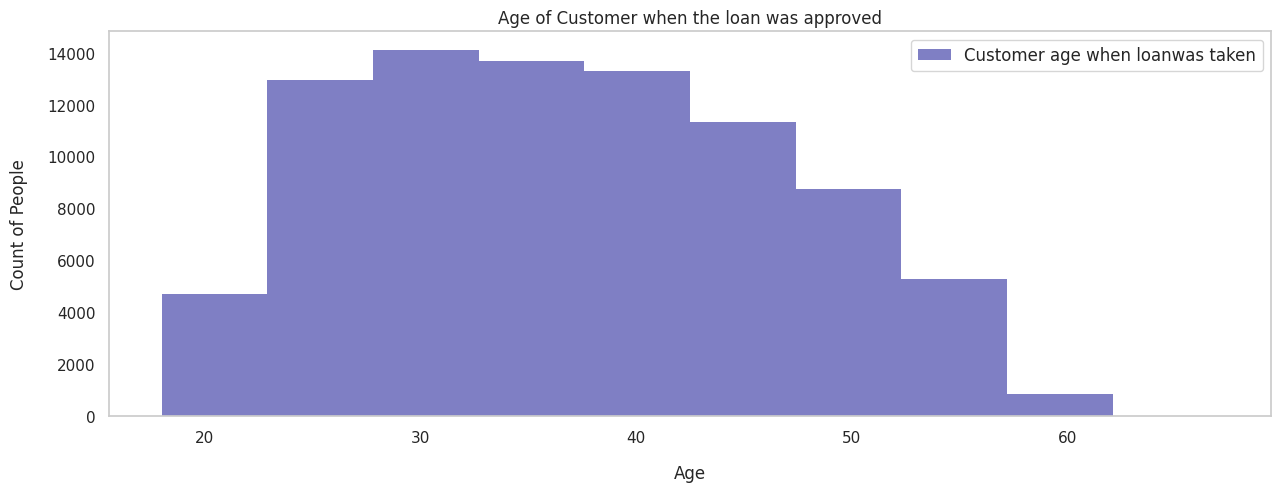

In [ ]:
plt.figure(figsize=(15, 5))

# Histogram for age at which the client took the loan
credit_risk_renamed['Customer age when loanwas taken'].plot(kind='hist', color='darkblue', alpha=0.5, edgecolor='none')

plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Age of Customer when the loan was approved")
plt.legend(loc="best", prop={"size": 12})

plt.gca().grid(False)  # Remove gridlines
plt.show()

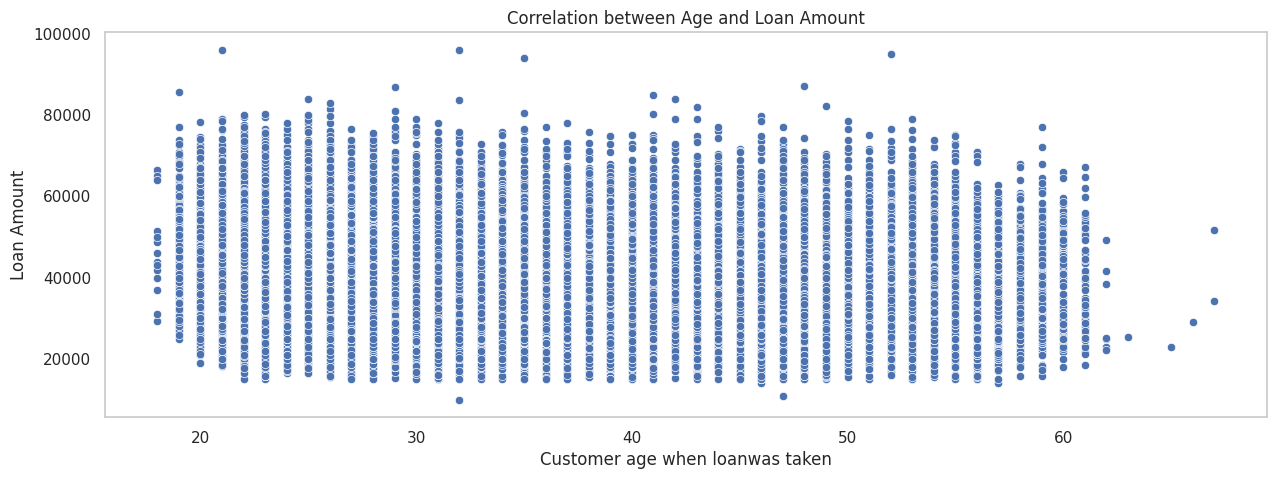

In [ ]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15, 5))
sns.scatterplot(data=credit_risk_renamed, x='Customer age when loanwas taken', y='Loan Amount')
plt.title("Correlation between Age and Loan Amount")
plt.gca().grid(False)  # Remove gridlines

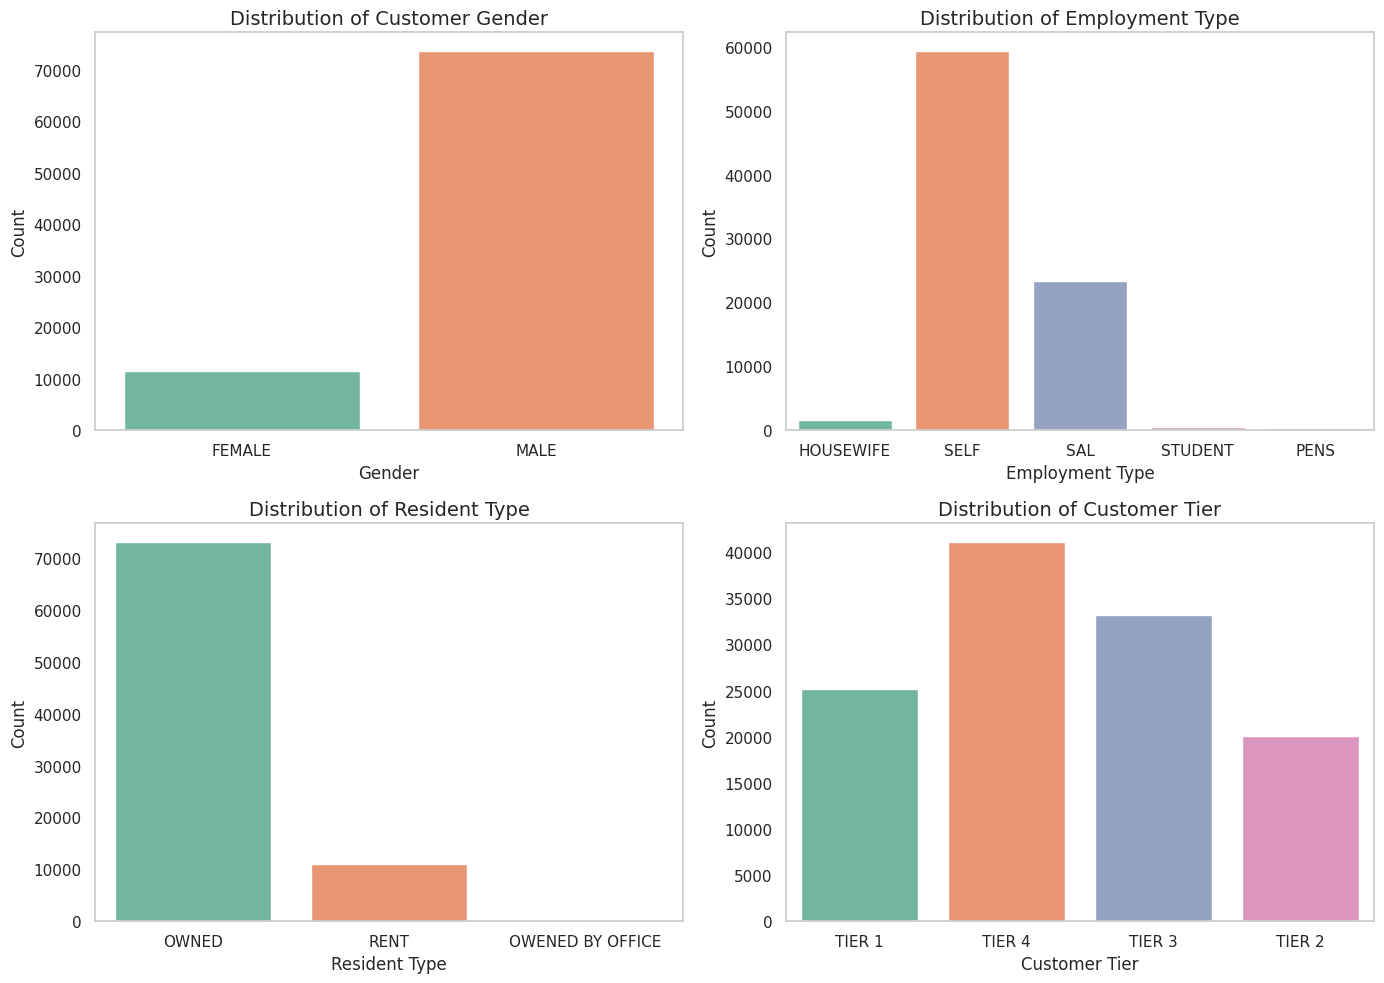

In [ ]:
# Set the color palette for the plots
palette = sns.color_palette('Set2', n_colors=4)

# Create a larger figure size
plt.figure(figsize=(14, 10))

# Countplot for Gender
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Customer Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

# Countplot for Employment Type
plt.subplot(2, 2, 2)
sns.countplot(x='Employment type', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Employment Type', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

# Countplot for Resident Type
plt.subplot(2, 2, 3)
sns.countplot(x='Resident type of customer', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Resident Type', fontsize=14)
plt.xlabel('Resident Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

# Countplot for Customer Tier
plt.subplot(2, 2, 4)
sns.countplot(x='Tier', data=credit_risk_renamed, palette=palette)
plt.title('Distribution of Customer Tier', fontsize=14)
plt.xlabel('Customer Tier', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.gca().grid(False)

plt.tight_layout()
plt.show()

## DATA CLEANING

In [35]:
# Drop unnecessary columns
columns_to_drop = [
    'Customer ID',  # Unique identifier, not useful for analysis
    'Dealer codes from where customer has purchased the Two wheeler',  # Categorical, limited relevance
    'Product code of Two wheeler',  # High cardinality, limited relevance
    'Date of birth'  # Redundant, as 'Customer age when loan was taken' exists
]
credit_risk_renamed = credit_risk_renamed.drop(columns=columns_to_drop, axis=1)

# Drop columns with > 70% missing
columns_to_drop = [
    'Time since last Personal loan taken (in months)',
    'Total sanctioned amount in the unsecured Loans which are Live',
    'Total sanctioned amount in the secured Loans which are Live',
    'Time since first consumer durables loan taken (in months)',
    'Max amount sanctioned in the Live loans'
]
credit_risk_renamed = credit_risk_renamed.drop(columns=columns_to_drop, axis=1)

# Verify the updated DataFrame
print("Remaining columns:")
print(credit_risk_renamed.columns)

Remaining columns:
Index(['Customer has bounced in first EMI', 'No of times bounced 12 months',
       'Maximum MOB', 'No of times bounced while repaying the loan', 'EMI',
       'Loan Amount', 'Tenure', 'No of advance EMI paid', 'Rate of interest',
       'Gender', 'Employment type', 'Resident type of customer',
       'Customer age when loanwas taken', 'No of loans', 'No of secured loans',
       'No of unsecured loans', 'No of new loans in last 3 months',
       'Maximum amount sanctioned for any Two wheeler loan',
       'No of times 30 days past due in last 6 months',
       'No of times 60 days past due in last 6 months',
       'No of times 90 days past due in last 3 months', 'Tier',
       'Target variable'],
      dtype='object')


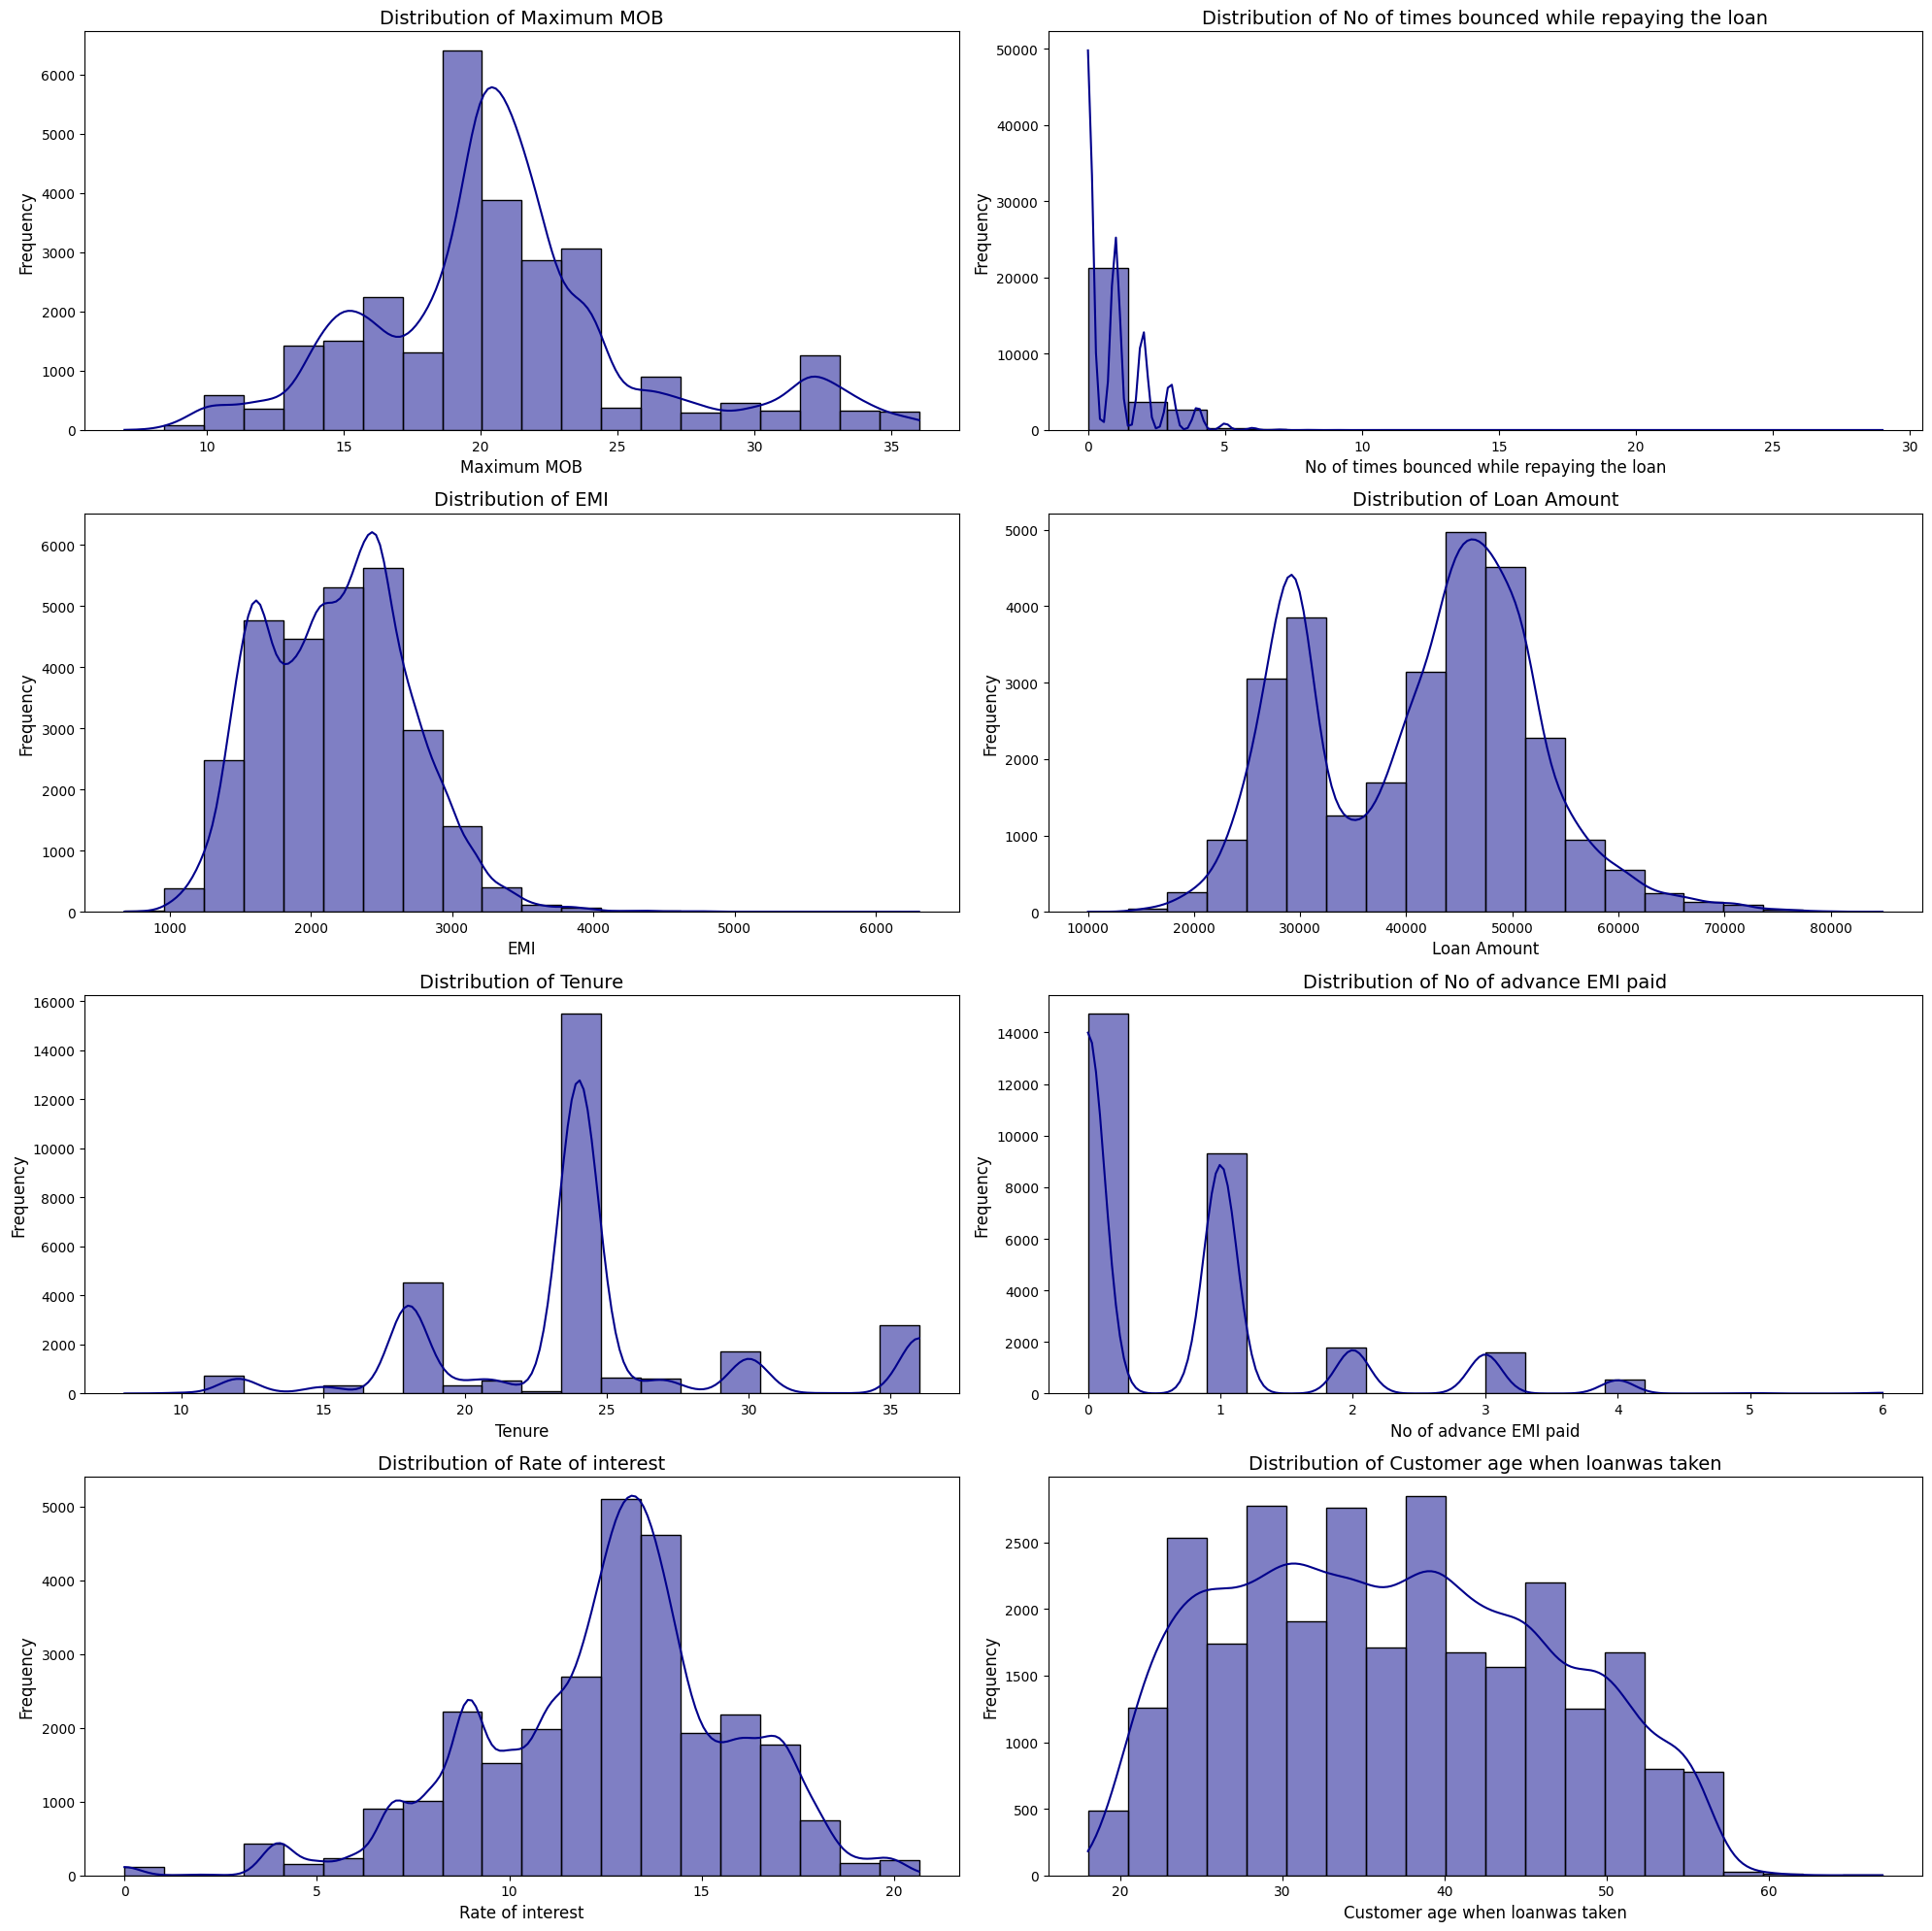

In [5]:
# Columns to visualize distributions
columns_to_plot = [
    'Maximum MOB',
    'No of times bounced while repaying the loan',
    'EMI',
    'Loan Amount',
    'Tenure',
    'No of advance EMI paid',
    'Rate of interest',
    'Customer age when loanwas taken'
]

# Setting up the plotting grid
plt.figure(figsize=(20, 20))
for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, idx)
    sns.histplot(credit_risk_renamed[col], bins=20, kde=True, color='darkblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)

plt.tight_layout()
plt.show()

###  Imputing missing values

In [36]:
# Selecting categorical and numerical variables based on updated column names
CatVariables = credit_risk_renamed.select_dtypes(include=['object']).columns
NumVariables = credit_risk_renamed.select_dtypes(include=['float', 'int']).columns

# Standardizing column names for categorical and numerical variables lists
CatVariables = (
    CatVariables
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

NumVariables = (
    NumVariables
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

# Display standardized column names for verification
print("Categorical Variables:", CatVariables.tolist())
print("Numerical Variables:", NumVariables.tolist())

Categorical Variables: ['gender', 'employment_type', 'resident_type_of_customer', 'tier']
Numerical Variables: ['customer_has_bounced_in_first_emi', 'no_of_times_bounced_12_months', 'maximum_mob', 'no_of_times_bounced_while_repaying_the_loan', 'emi', 'loan_amount', 'tenure', 'no_of_advance_emi_paid', 'rate_of_interest', 'customer_age_when_loanwas_taken', 'no_of_loans', 'no_of_secured_loans', 'no_of_unsecured_loans', 'no_of_new_loans_in_last_3_months', 'maximum_amount_sanctioned_for_any_two_wheeler_loan', 'no_of_times_30_days_past_due_in_last_6_months', 'no_of_times_60_days_past_due_in_last_6_months', 'no_of_times_90_days_past_due_in_last_3_months', 'target_variable']


### Imputation using median and mode

In [37]:
# Define numerical and categorical variables
NumVariables = credit_risk_renamed.select_dtypes(include=['float64', 'int64']).columns
CatVariables = credit_risk_renamed.select_dtypes(include=['object']).columns

# Impute missing values for numerical variables using median
for col in NumVariables:
    if credit_risk_renamed[col].isnull().sum() > 0:
        credit_risk_renamed[col].fillna(credit_risk_renamed[col].median(), inplace=True)

# Impute missing values for categorical variables using mode
for col in CatVariables:
    if credit_risk_renamed[col].isnull().sum() > 0:
        credit_risk_renamed[col].fillna(credit_risk_renamed[col].mode()[0], inplace=True)

# Display standardized column names and verify imputation
print("Categorical Variables:", CatVariables.tolist())
print("Numerical Variables:", NumVariables.tolist())
print("\nMissing values after imputation:")
print(credit_risk_renamed.isnull().sum())

Categorical Variables: ['Gender', 'Employment type', 'Resident type of customer', 'Tier']
Numerical Variables: ['Customer has bounced in first EMI', 'No of times bounced 12 months', 'Maximum MOB', 'No of times bounced while repaying the loan', 'EMI', 'Loan Amount', 'Tenure', 'No of advance EMI paid', 'Rate of interest', 'Customer age when loanwas taken', 'No of loans', 'No of secured loans', 'No of unsecured loans', 'No of new loans in last 3 months', 'Maximum amount sanctioned for any Two wheeler loan', 'No of times 30 days past due in last 6 months', 'No of times 60 days past due in last 6 months', 'No of times 90 days past due in last 3 months', 'Target variable']

Missing values after imputation:
Customer has bounced in first EMI                     0
No of times bounced 12 months                         0
Maximum MOB                                           0
No of times bounced while repaying the loan           0
EMI                                                   0
Loan Amoun

## ENCODING

In [38]:
# Select categorical columns
categorical_columns = credit_risk_renamed.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print(credit_risk_renamed[col].unique())
    print("-" * 50)

Column: Gender
['FEMALE' 'MALE']
--------------------------------------------------
Column: Employment type
['HOUSEWIFE' 'SELF' 'SAL' 'STUDENT' 'PENS']
--------------------------------------------------
Column: Resident type of customer
['OWNED' 'RENT' 'OWENED BY OFFICE']
--------------------------------------------------
Column: Tier
['TIER 1' 'TIER 4' 'TIER 3' 'TIER 2']
--------------------------------------------------


In [39]:
# Copy the dataset to preserve the original data
encoded_data = credit_risk_renamed.copy()

# Identify categorical columns
categorical_columns = encoded_data.select_dtypes(include=['object']).columns

# Initialize LabelEncoder for ordinal features
label_encoder = LabelEncoder()

# Specify ordinal columns
ordinal_columns = ['Tier']
for col in ordinal_columns:
    if col in encoded_data.columns:
        encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

# Identify nominal columns (categorical features that are not ordinal)
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

# Apply One-Hot Encoding to nominal columns
if nominal_columns:
    encoded_data = pd.get_dummies(encoded_data, columns=nominal_columns, drop_first=True)

# Verify all columns are numeric after encoding
print("\nData types after encoding:")
print(encoded_data.dtypes)


Data types after encoding:
Customer has bounced in first EMI                       int64
No of times bounced 12 months                           int64
Maximum MOB                                           float64
No of times bounced while repaying the loan           float64
EMI                                                   float64
Loan Amount                                           float64
Tenure                                                float64
No of advance EMI paid                                float64
Rate of interest                                      float64
Customer age when loanwas taken                       float64
No of loans                                             int64
No of secured loans                                     int64
No of unsecured loans                                   int64
No of new loans in last 3 months                        int64
Maximum amount sanctioned for any Two wheeler loan    float64
No of times 30 days past due in last 6 mon

In [40]:
# Convert boolean columns to int64
bool_columns = encoded_data.select_dtypes(include=['bool']).columns

# Changing bool columns to int64
encoded_data[bool_columns] = encoded_data[bool_columns].astype('int64')

# Display updated data types
print("Data types after converting bool columns to int64:")
print(encoded_data.dtypes)

Data types after converting bool columns to int64:
Customer has bounced in first EMI                       int64
No of times bounced 12 months                           int64
Maximum MOB                                           float64
No of times bounced while repaying the loan           float64
EMI                                                   float64
Loan Amount                                           float64
Tenure                                                float64
No of advance EMI paid                                float64
Rate of interest                                      float64
Customer age when loanwas taken                       float64
No of loans                                             int64
No of secured loans                                     int64
No of unsecured loans                                   int64
No of new loans in last 3 months                        int64
Maximum amount sanctioned for any Two wheeler loan    float64
No of times 30 days

In [11]:
# Verify remaining categorical variables
remaining_categorical = X.select_dtypes(include=['object']).columns
print("Remaining categorical variables:", remaining_categorical)

# Encoding any remaining categorical variables
if 'Gender' in remaining_categorical:
    X['Gender'] = X['Gender'].replace({'MALE': 1, 'FEMALE': 0})  # Binary encoding

NameError: name 'X' is not defined

## Class Imbalance

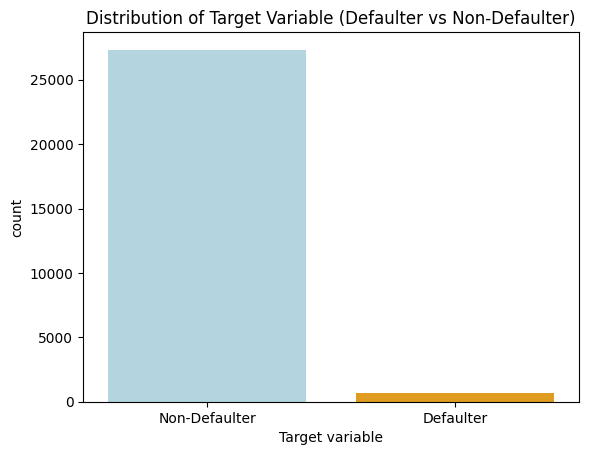

In [12]:
credit_risk_renamed['Target variable'] = credit_risk_renamed['Target variable'].replace({0: 'Non-Defaulter', 1: 'Defaulter'})
target_counts_renamed = credit_risk_renamed['Target variable'].value_counts()
# Visualize the distribution with colors
sns.countplot(x='Target variable', data=credit_risk_renamed, palette=['lightblue', 'orange'])
plt.title('Distribution of Target Variable (Defaulter vs Non-Defaulter)')
plt.show()

### Handling Data Imbalance with SMOTE

In [43]:
# Define features and target variable
X = encoded_data.drop(columns=['Target variable'])
y = encoded_data['Target variable']

# Separate features (X) and target variable (y)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the results
print("\nOriginal target variable distribution:")
print(y.value_counts())

print("\nResampled target variable distribution:")
print(pd.Series(y_resampled).value_counts())

print("\nShape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)


Original target variable distribution:
Target variable
0    116914
1      2614
Name: count, dtype: int64

Resampled target variable distribution:
Target variable
0    116914
1    116914
Name: count, dtype: int64

Shape of X_resampled: (233828, 26)
Shape of y_resampled: (233828,)


In [44]:
# Define mapping for defaulters and non-defaulters
target_mapping = {
    0.0: 'Non-Defaulter',
    1.0: 'Defaulter'
}

# Apply mapping to the target variable
y_resampled_labels = pd.Series(y_resampled).map(target_mapping)

# Check the resulting mapped target variable
print("\nMapped target variable distribution:")
print(y_resampled_labels.value_counts())


Mapped target variable distribution:
Target variable
Non-Defaulter    116914
Defaulter        116914
Name: count, dtype: int64


## MODELLING

### Splitting the Data

In [45]:
# Map the target labels to real-world labels
target_mapping = {
    0.0: 'Non-Defaulter',
    1.0: 'Defaulter'
}
y = encoded_data['Target variable'].map(target_mapping)

# Separate features and target
X = encoded_data.drop(columns=['Target variable'])

In [46]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (83669, 26)
Test set size: (35859, 26)


### Feature Scaling

In [47]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

### Model Training

#### Logistic Regression

In [48]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97788933 0.97771005 0.97759053 0.97776981 0.97752943] 0.9776978311154876


#### Support vector classification

In [27]:
# Support vector classification - RBF Kernel
pipe = make_pipeline(PolynomialFeatures(degree=1), SVC(kernel='rbf',C=25))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97552269 0.97552269 0.97552269 0.97577149 0.97577149] 0.975622210248533


#### Random Forest

In [50]:
# classification - Random Forest
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier(n_estimators=100,max_depth=100,criterion='entropy'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97771005 0.97693319 0.97675391 0.97782957 0.97776848] 0.9773990410957506


# Use the Model for New Test Cases

In [51]:
# Train model on train data
model = RandomForestClassifier(n_estimators=100,random_state=10,criterion='gini',max_depth = 100)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, random_state=10)

In [52]:
# Use the model to define new classes / test data on which the model has not been trained.
yhat = model.predict(X_test)

# Evaluate our model
print("Train set Accuracy: ", accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.998434306612963
Test set Accuracy:  0.9772999804790987


### Confusion Matrix

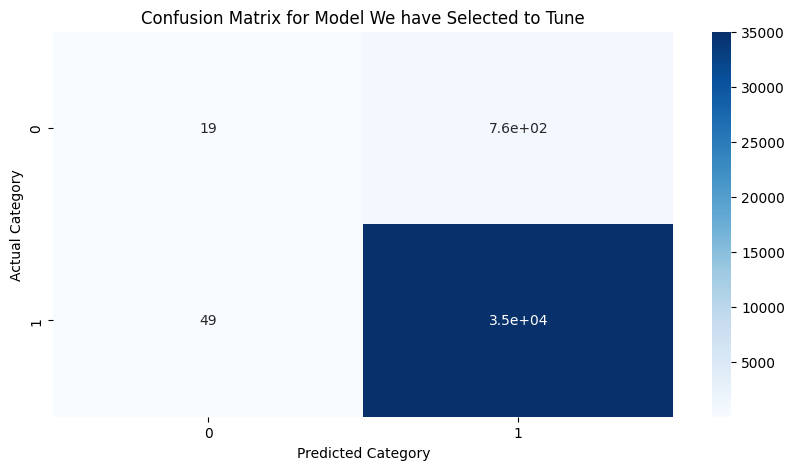

array([[   19,   765],
       [   49, 35026]])

In [53]:
matrix = confusion_matrix(y_test, yhat)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

matrix